In [56]:
# modules
import pandas as pd
import random
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# use a headless browser (saves time)
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--start-maximized")
driver = webdriver.Chrome(options=chrome_options)

# scrape 1
driver.get("https://covidlive.com.au/report/daily-vaccinations-people/act")
table =  WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, ".DAILY-VACCINATIONS-PEOPLE tbody"))
)
rows = table.find_elements_by_tag_name("tr")
headers = []
for th in rows[0].find_elements_by_tag_name("th"):
    headers.append(th.get_attribute("innerText").lower())
data1 = pd.DataFrame(columns=headers)
for i, row in enumerate(rows[1:]):
    datum = []
    for td in row.find_elements_by_tag_name("td"):
        datum.append(td.get_attribute("innerText"))    
    data1.loc[i + 1] = datum

# scrape 2
driver.get("https://covidlive.com.au/report/daily-vaccinations-source/act")
table =  WebDriverWait(driver, 5).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, ".DAILY-VACCINATIONS-SOURCE tbody"))
)
rows = table.find_elements_by_tag_name("tr")
headers = []
for th in rows[0].find_elements_by_tag_name("th"):
    headers.append(th.get_attribute("innerText").lower())
data2 = pd.DataFrame(columns=headers)
for i, row in enumerate(rows[1:]):
    datum = []
    for td in row.find_elements_by_tag_name("td"):
        datum.append(td.get_attribute("innerText"))    
    data2.loc[i + 1] = datum
    
driver.close()
driver.quit()

data1.set_index("date", inplace=True)
data2.set_index("date", inplace=True)
data = data1.merge(data2, left_index=True, right_index=True)
data

,first,second,hub,care,gp
date,,,,,
30 Aug 21,"220,052","139,929",-,-,-
29 Aug 21,"220,052","139,929","204,689","9,087","230,806"
28 Aug 21,"219,019","139,112","204,651","8,979","228,952"
27 Aug 21,"217,121","137,456","204,364","8,919","225,248"
26 Aug 21,"213,188","133,495","198,832","8,879","221,381"
...,...,...,...,...,...
13 Apr 21,0,N/A,"18,059","5,279","10,419"
12 Apr 21,0,N/A,"17,458","5,186","9,729"
11 Apr 21,0,N/A,"16,979","5,186","9,186"


<AxesSubplot:xlabel='date'>

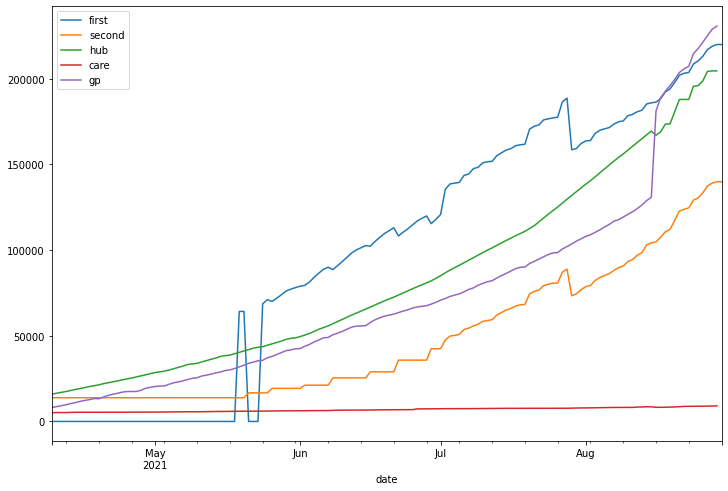

In [65]:
data.index = pd.to_datetime(data.index, format="%d %b %y")
data.replace(",", "", regex=True, inplace=True)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")
data.plot(figsize=(12, 8))